# Basics of logistic regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [92]:
raw_data = pd.read_csv(r'https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')
raw_data.head(1)
raw_data.columns = raw_data.columns.str.strip()
raw_data['Distance (mi)'] = pd.to_numeric(raw_data['Distance (mi)'], errors='coerce')
raw_data['Workout Time (seconds)'] = pd.to_numeric(raw_data['Workout Time (seconds)'], errors='coerce')

In [67]:
# raw_data['Distance (mi)'] = raw_data['Distance (mi)'].astype(float)

In [132]:
#create my bins
bins = [0, 6.19, 15]
labels = ['No', 'Yes']
raw_data['10k'] = pd.cut(raw_data['Distance (mi)'], bins=bins, labels=labels)

In [133]:
# Replace all No entries with 0, and all Yes entries with 1
data = raw_data.copy()
data['10k2'] = data['10k'].map({'Yes': 1, 'No': 0})
data

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,5k,10k,10k2
0,"June 4, 2022","June 4, 2022",Run,856,6.24228,3946,10.53330,1.068360,5.69620,56.16070,156.0,10427.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6623599279,Yes,Yes,1
1,"June 3, 2022","June 3, 2022",Run,397,3.10851,1864,9.98908,0.951188,6.00656,63.07900,152.0,4863.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6621191320,Yes,No,0
2,"June 1, 2022","June 1, 2022",Run,416,3.10000,1817,9.76882,0.000000,6.14199,0.00000,NaN,4822.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6615977731,Yes,No,0
3,"May 31, 2022","May 31, 2022",Run,546,4.08000,2377,9.70997,1.282750,6.17922,46.77460,145.0,4048.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6615791770,Yes,No,0
4,"May 30, 2022","May 30, 2022",Run,418,3.10044,1873,10.05970,0.453169,5.96441,132.40100,159.0,4873.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6612772204,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,"May 13, 2019","May 13, 2019",Indoor Run / Jog,191,1.42000,927,10.88030,17.088100,5.51456,3.51122,158.0,67.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/3540369238,No,No,0
676,"Oct. 19, 2016","Oct. 19, 2016",Class Workout,186,0.00000,3600,0.00000,0.000000,0.00000,0.00000,NaN,NaN,b'',MyFitnessPal,http://www.mapmyfitness.com/workout/1819452119,NaN,NaN,NaN
677,"Oct. 12, 2016","Oct. 12, 2016",Class Workout,183,0.00000,3600,0.00000,0.000000,0.00000,0.00000,NaN,NaN,b'',MyFitnessPal,http://www.mapmyfitness.com/workout/1805719352,NaN,NaN,NaN
678,"Sept. 26, 2016","Sept. 26, 2016",Class Workout,186,0.00000,3600,0.00000,0.000000,0.00000,0.00000,NaN,NaN,b'',MyFitnessPal,http://www.mapmyfitness.com/workout/1773264605,NaN,NaN,NaN


In [134]:
data['Workout Date'] = pd.to_datetime(data['Workout Date'])
data['Date Submitted'] = pd.to_datetime(data['Date Submitted'])
mean_speed = data['Avg Heart Rate'].mean()
#temp['Avg_Heart_Rate'].fillna(value = mean_value, inplace = True)

#step_value = temp['Steps'].mean()
#temp['Steps'].fillna(value = step_value, inplace = True)
data['day_of_week']=data['Workout Date'].dt.day_name()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Submitted          680 non-null    datetime64[ns]
 1   Workout Date            680 non-null    datetime64[ns]
 2   Activity Type           680 non-null    object        
 3   Calories Burned (kCal)  680 non-null    int64         
 4   Distance (mi)           680 non-null    float64       
 5   Workout Time (seconds)  680 non-null    int64         
 6   Avg Pace (min/mi)       680 non-null    float64       
 7   Max Pace (min/mi)       680 non-null    float64       
 8   Avg Speed (mi/h)        680 non-null    float64       
 9   Max Speed (mi/h)        680 non-null    float64       
 10  Avg Heart Rate          448 non-null    float64       
 11  Steps                   656 non-null    float64       
 12  Notes                   680 non-null    object    

In [135]:
data = data[data['Avg Pace (min/mi)'].between(6, 13)]

In [136]:
data.shape

(516, 19)

In [137]:
meanahr = data['Avg Heart Rate'].mean()
data['Avg Heart Rate'].fillna(value = meanahr, inplace = True)
#data.fillna(meanahr, inplace = True)

C:\Users\coleb\AppData\Local\Temp\ipykernel_28616\2042630370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Avg Heart Rate'].fillna(value = meanahr, inplace = True)


In [138]:
data2 = data.dropna()
data2 = data2.drop_duplicates()

In [139]:
data2.shape

(516, 19)

In [140]:
data.corr()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps
Calories Burned (kCal),1.000000,0.974388,0.970305,0.251218,-0.143428,-0.249423,0.054412,0.192392,0.961397
Distance (mi),0.974388,1.000000,0.982169,0.213681,-0.137806,-0.213932,0.068843,0.232198,0.982305
Workout Time (seconds),0.970305,0.982169,1.000000,0.362987,-0.113678,-0.357566,0.084988,0.226202,0.986624
Avg Pace (min/mi),0.251218,0.213681,0.362987,1.000000,0.068318,-0.989153,0.053250,0.138135,0.313577
Max Pace (min/mi),-0.143428,-0.137806,-0.113678,0.068318,1.000000,-0.080909,-0.081252,0.023084,-0.150903
Avg Speed (mi/h),-0.249423,-0.213932,-0.357566,-0.989153,-0.080909,1.000000,-0.052070,-0.150471,-0.314939
Max Speed (mi/h),0.054412,0.068843,0.084988,0.053250,-0.081252,-0.052070,1.000000,0.038805,0.082758
Avg Heart Rate,0.192392,0.232198,0.226202,0.138135,0.023084,-0.150471,0.038805,1.000000,0.225847
Steps,0.961397,0.982305,0.986624,0.313577,-0.150903,-0.314939,0.082758,0.225847,1.000000


## Variables

In [141]:
# Create the dependent and independent variables
y = data2['10k2']
x1 = data2['Calories Burned (kCal)']

In [142]:
y.shape

(516,)

In [143]:
x1.shape

(516,)

In [144]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.048371
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   10k2   No. Observations:                  516
Model:                          Logit   Df Residuals:                      514
Method:                           MLE   Df Model:                            1
Date:                Sun, 05 Jun 2022   Pseudo R-squ.:                  0.8624
Time:                        13:15:30   Log-Likelihood:                -24.959
converged:                       True   LL-Null:                       -181.38
Covariance Type:            nonrobust   LLR p-value:                 5.255e-70
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -16.8849      2.685     -6.288      0.000     -22.148     -11.622
Calories Burned (kCal)     0.0229      0.004      6.361      0.000       0.016       0.030
==========================================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Let's plot the data

### Scatter plot

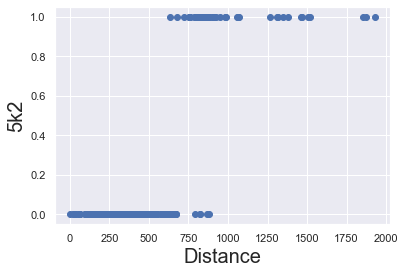

In [145]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1,y, color='C0')
# Don't forget to label your axes!
plt.xlabel('Distance', fontsize = 20)
plt.ylabel('5k2', fontsize = 20)
plt.show()

### Plot with a regression line

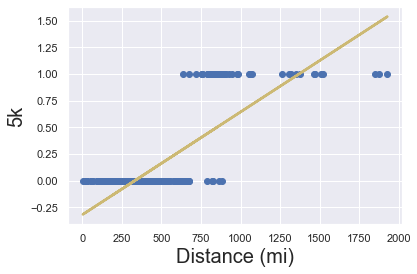

In [146]:
# Create a linear regression on the data in order to estimate the coefficients and be able to plot a regression line
# The data is not linear, so the linear regression doesn't make much sense
x = sm.add_constant(x1)
# I'll call it reg_lin, instead of reg, as we will be dealing with logistic regressions later on
reg_lin = sm.OLS(y,x)
# I'll segment it into regression and fitted regression (results) as I can use the results as an object for some operations
results_lin = reg_lin.fit()

# Create a scatter plot
plt.scatter(x1,y,color = 'C0')
# Plot the regression line. The coefficients are coming from results_lin.params
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('Distance (mi)', fontsize = 20)
plt.ylabel('10k', fontsize = 20)
plt.show()

### Plot a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.048371
         Iterations 11


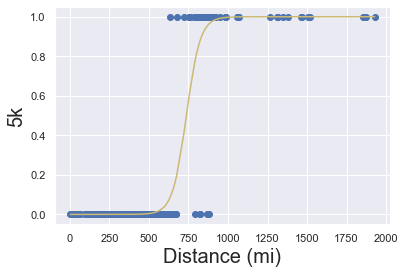

In [147]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('Distance (mi)', fontsize = 20)
plt.ylabel('5k', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

Optimization terminated successfully.
         Current function value: 0.048371
         Iterations 11


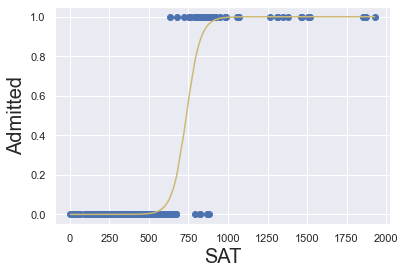

In [148]:
# Creating a logit regression (we will discuss this in another notebook)
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()

# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
# Plotting the curve
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

## Cluster Analysis

In [149]:
data.head(1)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,5k,10k,10k2,day_of_week
0,2022-06-04,2022-06-04,Run,856,6.24228,3946,10.5333,1.06836,5.6962,56.1607,156.0,10427.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6623599279,Yes,Yes,1,Saturday


In [150]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns

In [151]:
round(data.describe(),2)

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps
count,516.00,516.00,516.00,516.00,516.00,516.00,516.00,516.00,516.00
mean,447.48,3.54,2054.67,9.56,1.35,6.33,47.03,123.23,5444.41
std,251.58,1.91,1229.00,0.91,2.59,0.57,126.48,45.54,3196.37
min,2.00,0.02,10.00,7.77,0.00,4.63,0.00,0.00,8.00
25%,340.50,2.90,1552.50,8.95,0.00,6.03,0.00,123.23,4127.50
50%,407.50,3.10,1800.00,9.50,0.79,6.32,16.44,123.23,4789.00
75%,468.00,3.86,2187.00,9.96,1.15,6.70,61.91,152.00,5895.75
max,1928.00,13.48,10191.00,12.95,31.95,7.72,1814.43,169.00,23604.00


In [153]:

df_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
Date Submitted,444
Workout Date,470
Activity Type,4
Calories Burned (kCal),292
Distance (mi),392
Workout Time (seconds),424
Avg Pace (min/mi),499
Max Pace (min/mi),319
Avg Speed (mi/h),501


In [154]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['5k', '10k', '10k2']

In [155]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['Activity Type']

In [156]:
[[i, list(data[i].unique())] for i in categorical_variables]

[['Activity Type', ['Run', 'Indoor Run / Jog', 'Machine Workout', 'Walk']]]

In [157]:
ordinal_variables = ['Run', 'Walk']

In [158]:
data['day_of_week'].unique()

array(['Saturday', 'Friday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday',
       'Thursday'], dtype=object)

In [159]:
ordinal_variables.append('day_of_week')

In [161]:
numeric_variables = list(set(data.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

array([[<AxesSubplot:title={'center':'Steps'}>,
        <AxesSubplot:title={'center':'Max Speed (mi/h)'}>,
        <AxesSubplot:title={'center':'Avg Speed (mi/h)'}>],
       [<AxesSubplot:title={'center':'Distance (mi)'}>,
        <AxesSubplot:title={'center':'Avg Pace (min/mi)'}>,
        <AxesSubplot:title={'center':'Workout Date'}>],
       [<AxesSubplot:title={'center':'Workout Time (seconds)'}>,
        <AxesSubplot:title={'center':'Avg Heart Rate'}>,
        <AxesSubplot:title={'center':'Max Pace (min/mi)'}>],
       [<AxesSubplot:title={'center':'Date Submitted'}>,
        <AxesSubplot:title={'center':'Calories Burned (kCal)'}>,
        <AxesSubplot:>]], dtype=object)

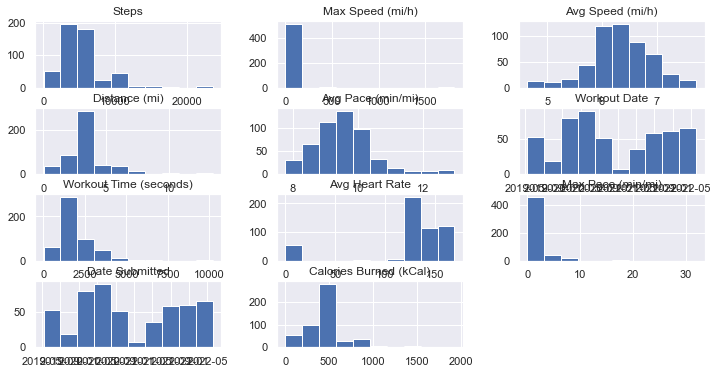

In [162]:
data[numeric_variables].hist(figsize=(12, 6))

In [164]:
# data['day_of_week'] = pd.cut(data['day_of_week'], bins=5)

Having set up the variables, remember that the K-nearest neighbors algorithm uses distance and hence requires scaled data.
Scale the data using one of the scaling methods discussed in the course.
Save the processed dataframe as a comma-separated file: 

In [165]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [166]:
lb, le = LabelBinarizer(), LabelEncoder()

In [169]:
# for column in ordinal_variables:
#     data[column] = le.fit_transform(data[column])

In [170]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [173]:
# for column in [ordinal_variables + numeric_variables]:
#     data[column] = mm.fit_transform(data[column])

In [175]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [217]:
df = data

In [218]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 675
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Submitted          516 non-null    datetime64[ns]
 1   Workout Date            516 non-null    datetime64[ns]
 2   Activity Type           516 non-null    object        
 3   Calories Burned (kCal)  516 non-null    int64         
 4   Distance (mi)           516 non-null    float64       
 5   Workout Time (seconds)  516 non-null    int64         
 6   Avg Pace (min/mi)       516 non-null    float64       
 7   Max Pace (min/mi)       516 non-null    float64       
 8   Avg Speed (mi/h)        516 non-null    float64       
 9   Max Speed (mi/h)        516 non-null    float64       
 10  Avg Heart Rate          516 non-null    float64       
 11  Steps                   516 non-null    float64       
 12  Notes                   516 non-null    object    

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link', '5k', '10k', '10k2', 'day_of_week'],
      dtype='object')

In [219]:
df = df[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Steps', '10k2']].round(0)

In [229]:
# Set up X and y variables
y, X = df['10k2'], df.drop(columns='10k2')
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [230]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       181
           1       1.00      0.96      0.98        26

    accuracy                           1.00       207
   macro avg       1.00      0.98      0.99       207
weighted avg       1.00      1.00      1.00       207

Accuracy score:  1.0
F1 Score:  0.98


Text(0.5, 84.5, 'Ground Truth')

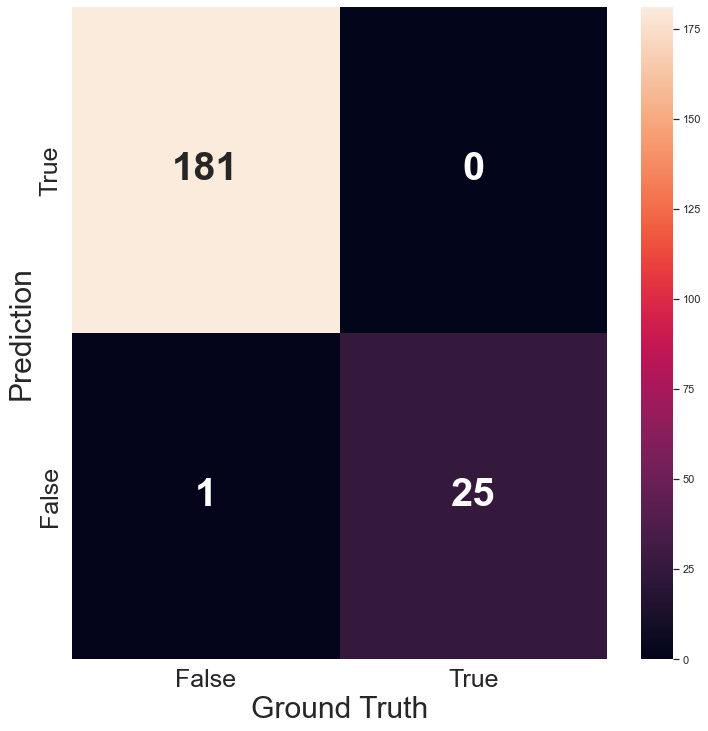

In [231]:
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

Using the same split of training and test samples, estimate another K-Nearest Neighbors model.
This time, use K=5 and weight the results by distance.
Again, examine the Precision, Recall, F-1 Score, and Accuracy of the classification, and visualize the Confusion Matrix.

In [232]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       181
           1       1.00      0.96      0.98        26

    accuracy                           1.00       207
   macro avg       1.00      0.98      0.99       207
weighted avg       1.00      1.00      1.00       207

Accuracy score:  1.0
F1 Score:  0.98


Text(0.5, 84.5, 'Ground Truth')

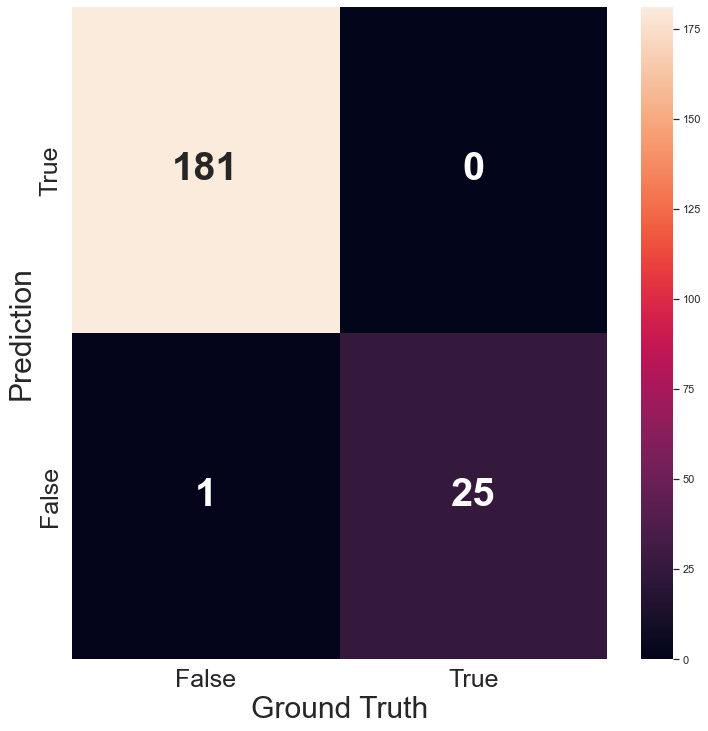

In [233]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

In [234]:
### BEGIN SOLUTION
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

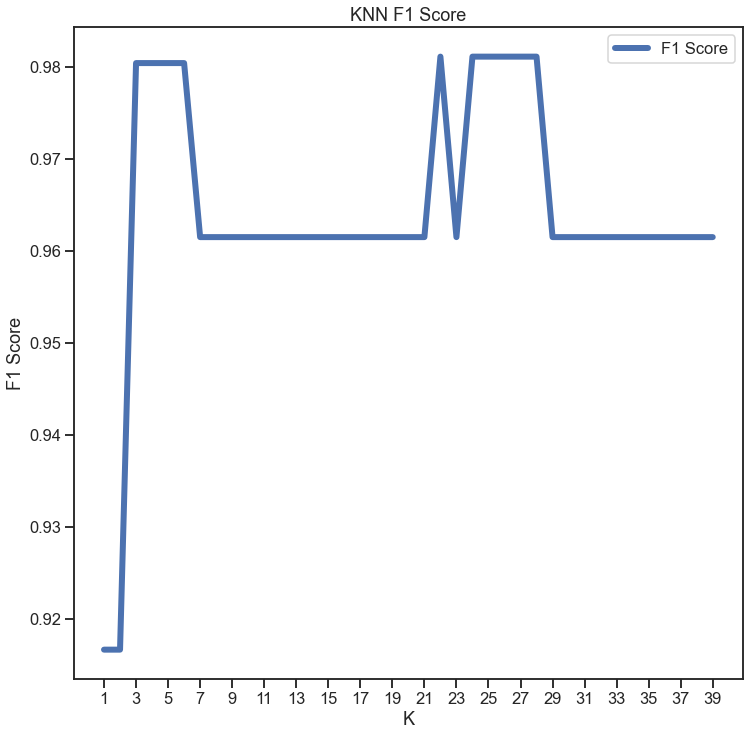

In [235]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

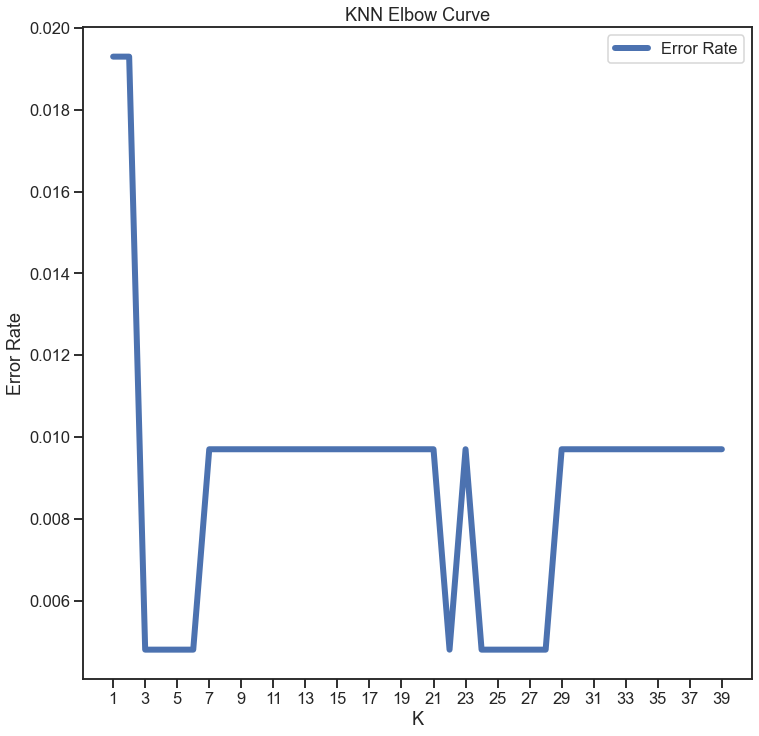

In [236]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION

## KNN

In [305]:
data2 = data[['Calories Burned (kCal)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Steps', 'Distance (mi)', '10k2']]

In [306]:
X = data2.iloc[:, :-1]
y = data2.iloc[:, -1:]

In [307]:
X.describe()

,Calories Burned (kCal),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Steps,Distance (mi)
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,447.484496,2054.668605,9.562409,1.351160,6.327553,47.030610,5444.414729,3.541362
std,251.582181,1228.997066,0.906790,2.590481,0.565956,126.475776,3196.365506,1.912918
min,2.000000,10.000000,7.774190,0.000000,4.633750,0.000000,8.000000,0.015731
25%,340.500000,1552.500000,8.949298,0.000000,6.025730,0.000000,4127.500000,2.897500
50%,407.500000,1800.000000,9.499410,0.792641,6.316180,16.439650,4789.000000,3.100000
75%,468.000000,2187.000000,9.957292,1.148737,6.704437,61.907650,5895.750000,3.860532
max,1928.000000,10191.000000,12.948500,31.954800,7.717840,1814.430000,23604.000000,13.481600


In [308]:
y.value_counts(normalize=True)

10k2
0       0.887597
1       0.112403
dtype: float64

<AxesSubplot:xlabel='10k2'>

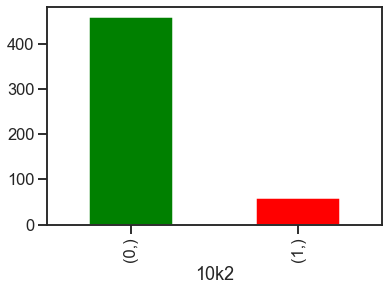

In [309]:
y.value_counts().plot.bar(color=['green', 'red'])

In [310]:
# Split 80% as training dataset
# and 20% as testing dataset
rs=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

Training a KNN classifier is very similar to training other classifiers in `sklearn`, we first need to define a `KNeighborsClassifier` object. Here we use `n_neighbors=2` argument to specify how many neighbors will be used for prediction, and we keep other arguments to be their default values.


In [311]:
# Define a KNN classifier with `n_neighbors=2`
knn_model = KNeighborsClassifier(n_neighbors=2)

In [312]:
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [313]:
preds = knn_model.predict(X_test)

In [314]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [315]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='micro')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [316]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9807692307692307,
 'recall': 0.9807692307692307,
 'precision': 0.9807692307692307,
 'f1score': 0.9807692307692307}

In [317]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0, 'f1score': 1.0}

In [318]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store f1score for each k
f1_scores = []

In [319]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.9600
2,0.9091
3,0.9600
4,0.9565
5,1.0000
6,1.0000
7,0.9600
8,1.0000
9,0.9600


Text(0.5, 1.0, 'KNN F1 Score')

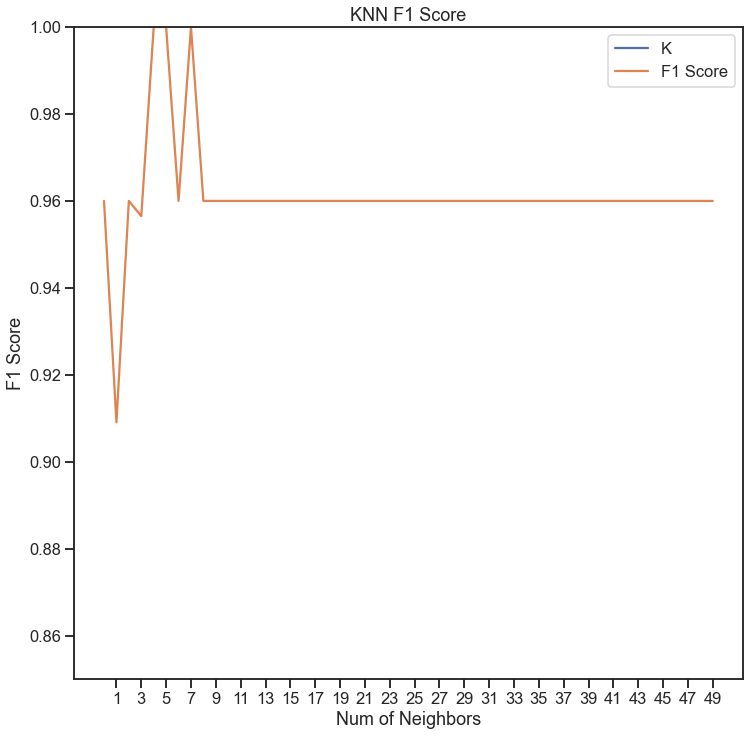

In [320]:
# Plot F1 results
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.85, 1))
plt.title('KNN F1 Score')